In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [101]:
time_df = pd.read_csv("hadoop_reports/hadoop_timeline_03-29-2021.txt", delim_whitespace=True)
time_df_years = time_df[~time_df.year.str.contains(":")].year.astype(int)
dead_users = time_df[~time_df.year.str.contains(":")][time_df_years < 2019].user.values

In [102]:
dead_users

array(['alex', 'alja', 'apatters', 'areinsvo', 'balaji', 'bauerdic',
       'bkansal', 'bmarsh', 'bockjoo', 'branson', 'burkett', 'burt',
       'capalmer', 'cawest', 'ccollard', 'cerati', 'cfangmei', 'cms2',
       'cms-a', 'cms-b', 'cms-c', 'cms-d', 'cms-e', 'cms-f', 'cwelke',
       'dalfonso', 'danphan', 'deldred', 'dklein', 'dlevans', 'dmytro',
       'dsklein', 'duanders', 'echabert', 'ekennedy', 'emanuele',
       'esmaeel', 'fahim', 'fgior8', 'fkw', 'gailgh', 'gdyckes',
       'georgia', 'gpetrucc', 'grmercad', 'gutsche', 'hatake', 'heilman',
       'hernan', 'hlliu', 'holzner', 'iandyckes', 'jbradmil', 'jdost',
       'jgran', 'jgwood', 'jletts', 'jmuelmen', 'jribnik', 'jschrott',
       'kburt', 'kelley', 'liamb315', 'linacre', 'lost+found', 'lshchuts',
       'lveldere', 'magania', 'magini', 'mderdzin', 'mderdzinski',
       'mjansova', 'mmasciov', 'mnorman', 'mpieri', 'nguyenh', 'noachr',
       'olivito', 'owen', 'paktinat', 'pbgeff', 'pjandir', 'rbhandar',
       'rclsa',

In [115]:
len(dead_users)

107

In [103]:
hadoop_df = pd.read_csv("hadoop_reports/hadoop_usage_03-29-2021.txt", delim_whitespace=True)
hadoop_df["user"] = hadoop_df.path.str.split("/").str.get(-1)
# Sort by usage
hadoop_df.sort_values("after_rep", ascending=False, inplace=True, ignore_index=True)

In [110]:
np.sum(hadoop_df[np.isin(hadoop_df.user, dead_users)].after_rep)/(10**12)

61.722380592748

In [114]:
len(hadoop_df.user)

182

In [106]:
usages = hadoop_df.sort_values("after_rep", ascending=False).after_rep.values

In [111]:
np.sum(hadoop_df.after_rep)/(10**12)

511.773425639366

In [113]:
np.sum(hadoop_df.after_rep[:2])/np.sum(hadoop_df[~np.isin(hadoop_df.user, dead_users)].after_rep)

0.4424632926552881

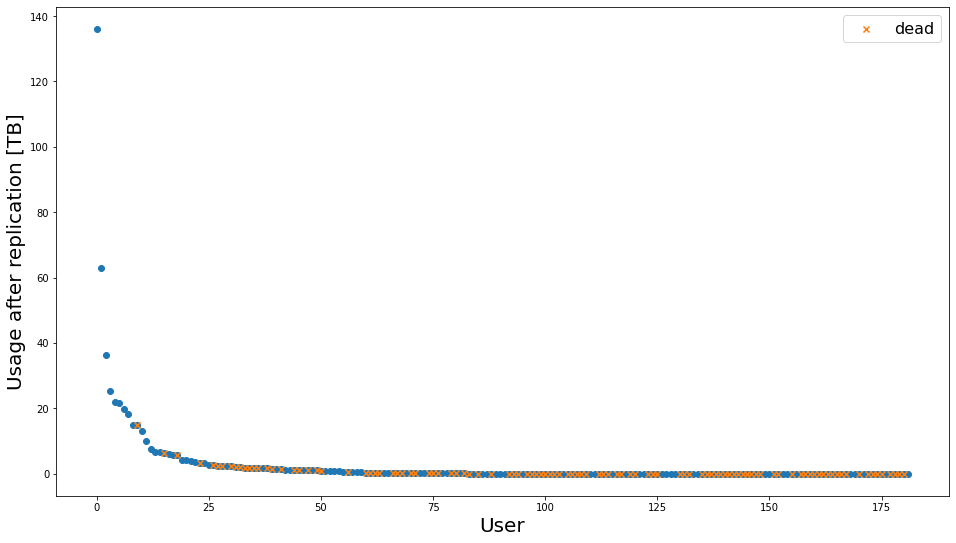

In [116]:
fig, axes = plt.subplots(figsize=(16, 9))
axes.scatter(
    hadoop_df.index,
    hadoop_df.after_rep/(10**12)
);
axes.scatter(
    hadoop_df[np.isin(hadoop_df.user, dead_users)].index,
    hadoop_df[np.isin(hadoop_df.user, dead_users)].after_rep/(10**12),
    marker="x",
    label="dead"
)
axes.set_ylabel("Usage after replication [TB]", size=20);
axes.set_xlabel("User", size=20);
axes.legend(fontsize=16);

In [126]:
top_dead = hadoop_df[np.isin(hadoop_df.user, dead_users)][:20].copy()

In [127]:
top_dead["after_rep_TB"] = top_dead.after_rep/10**12

In [128]:
top_dead

,before_rep,after_rep,path,user,after_rep_TB
9,7374967263366,14749934526732,/cms/store/user/branson,branson,14.749935
15,3140350104195,6280700208390,/cms/store/user/rbhandar,rbhandar,6.280700
18,2790180723796,5580361447592,/cms/store/user/esmaeel,esmaeel,5.580361
23,1611455550280,3222911100560,/cms/store/user/mmasciov,mmasciov,3.222911
26,1281206759418,2562413518836,/cms/store/user/wverbeke,wverbeke,2.562414
27,1232918044333,2465836088666,/cms/store/user/gpetrucc,gpetrucc,2.465836
28,1161434791016,2322869582032,/cms/store/user/vdutta,vdutta,2.322870
30,1089108574536,2178217149072,/cms/store/user/dmytro,dmytro,2.178217
31,963279472359,1926558944718,/cms/store/user/dsklein,dsklein,1.926559
32,950064861200,1900129722400,/cms/store/user/mderdzin,mderdzin,1.900130


In [131]:
hadoop_df[np.isin(hadoop_df.user, dead_users)][:20].after_rep/10**12

9     14.749935
15     6.280700
18     5.580361
23     3.222911
26     2.562414
27     2.465836
28     2.322870
30     2.178217
31     1.926559
32     1.900130
33     1.805455
34     1.796493
35     1.666224
36     1.654294
38     1.633348
39     1.487273
41     1.324622
44     1.047215
45     1.036247
47     0.976093
Name: after_rep, dtype: float64

In [132]:
np.sum(hadoop_df[np.isin(hadoop_df.user, dead_users)][:20].after_rep)/10**12

57.61719554636

In [78]:
hadoop_df

,before_rep,after_rep,path,user
0,53012496443835,136110418040274,/cms/store/user/usarica,usarica
1,36096094481187,63020649214006,/cms/store/user/mcitron,mcitron
2,16607387195971,36135016752016,/cms/store/user/namin,namin
3,12215829377653,25410713272419,/cms/store/user/phchang,phchang
4,7408816717734,21932617643053,/cms/store/user/sicheng,sicheng
...,...,...,...,...
177,0,0,/cms/store/user/hatake,hatake
178,0,0,/cms/store/user/gutsche,gutsche
179,0,0,/cms/store/user/georgia,georgia
180,0,0,/cms/store/user/gdyckes,gdyckes


In [52]:
def plot_lorenz_curve(hadoop_df, N_points=500, no_plot=False):
    """Fraction of wealth held by actors with wealth < w vs. fraction of actors that
       hold wealth < w, where w is some percentage of the total wealth
    """
    # Compute diagnostic information about population
    total_wealth = np.sum(hadoop_df.after_rep)
    sorted_bank = hadoop_df.sort_values("after_rep", ascending=False).after_rep.values
    N_actors = len(hadoop_df.user)
    # Compute values for Lorenz curve
    cumulative_wealth = []
    cumulative_actors = []
    for p in np.linspace(0, 1, N_points):
        actors_with_lt_w = sorted_bank < total_wealth*p
        # Fraction of wealth held by actors with wealth < w
        cumulative_wealth.append(
            np.sum(sorted_bank[actors_with_lt_w])/total_wealth
        )
        # Fraction of actors that hold wealth < w
        cumulative_actors.append(np.sum(actors_with_lt_w)/N_actors)
    # Cast to numpy arrays
    cumulative_wealth = np.array(cumulative_wealth)
    cumulative_actors = np.array(cumulative_actors)     
    # Calculate Gini coefficient
    gini = (np.trapz(cumulative_actors, cumulative_wealth)-0.5)/0.5
    if no_plot:
        return gini
    else:
        # Set up plot
        fig = plt.figure(figsize=(10,10))
        axes = plt.subplot(111)
        axes.set_aspect(1.0)
        # Fill plot
        plt.scatter(cumulative_actors, cumulative_wealth, s=10);
        plt.xlabel("Cumulative Population", size=16);
        plt.ylabel("Cumulative Wealth", size=16);
        plt.title("Lorenz Curve (Gini = {:.3f})".format(gini), size=16);
        return

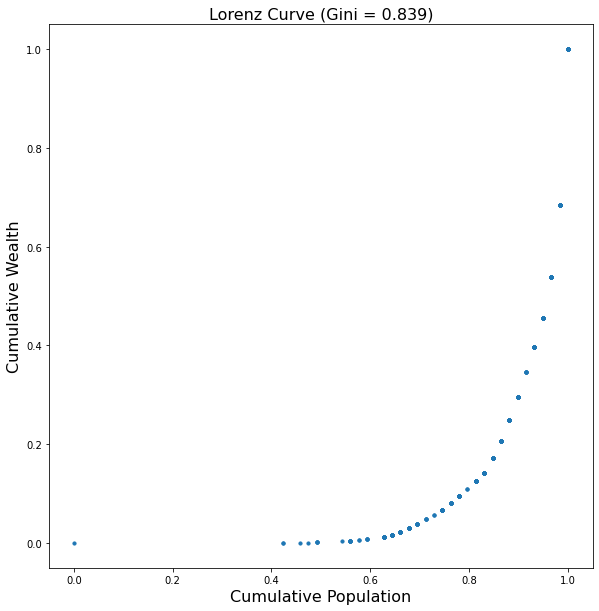

In [89]:
plot_lorenz_curve(hadoop_df[~np.isin(hadoop_df.user, dead_users)], N_points=10000)